In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv('salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [3]:
X = df[['company', 'job', 'degree']]
Y = df.salary_more_then_100k

---
# Why Decision Tree don't need to Drop a Dummy Column
### No Multicollinearity Issue: 
Unlike linear models, Decision Trees do not suffer from multicollinearity 
because they make splits based on individual features without considering linear combinations.
### No Impact on Performance: 
Including all one-hot encoded columns provides the tree with complete information 
about the categorical variable, potentially leading to more accurate splits.

---

In [4]:
X_encoded = X.replace({'bachelors': 0, 'masters': 1})
X_dummies = pd.get_dummies(X_encoded, columns=['company', 'job'], dtype='int16')
X_dummies = X_dummies.replace({'bachelors': 0, 'masters': 1})
X_dummies.iloc[:5]

C:\Users\Admin\AppData\Local\Temp\ipykernel_8104\3500407772.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_encoded = X.replace({'bachelors': 0, 'masters': 1})


,degree,company_abc pharma,company_facebook,company_google,job_business manager,job_computer programmer,job_sales executive
0,0,0,0,1,0,0,1
1,1,0,0,1,0,0,1
2,0,0,0,1,1,0,0
3,1,0,0,1,1,0,0
4,0,0,0,1,0,1,0


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X_dummies, Y, train_size=0.5, random_state=100)
X_train.shape, X_test.shape

((8, 7), (8, 7))

In [6]:
np.unique(Y_train, return_counts=True)

(array([0, 1], dtype=int64), array([4, 4], dtype=int64))

# Decision Tree using Entropy/Gini as Criterion

In [7]:
DTC = DecisionTreeClassifier(criterion='gini')
DTC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [8]:
Yp_test = DTC.predict(X_test)
print(Yp_test)
print(Y_test.values)

[1 0 1 0 1 0 1 0]
[1 1 1 0 1 0 1 1]


In [9]:
cm = confusion_matrix(Y_test, Yp_test)
cm

array([[2, 0],
       [2, 4]], dtype=int64)

In [10]:
report = classification_report(Y_test, Yp_test)
print(report)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.67      0.80         6

    accuracy                           0.75         8
   macro avg       0.75      0.83      0.73         8
weighted avg       0.88      0.75      0.77         8



# Graph of Training Decision Tree

In [11]:
Yp_train = DTC.predict(X_train)
np.unique(Yp_train, return_counts=True)

(array([0, 1], dtype=int64), array([4, 4], dtype=int64))

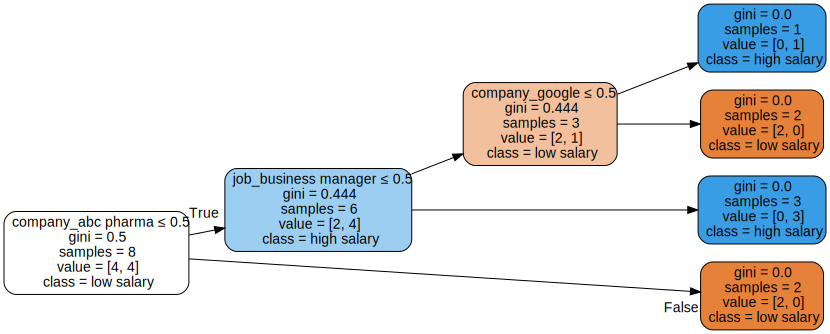

<Figure size 100x100 with 0 Axes>

In [14]:
import graphviz
dot = export_graphviz(DTC, feature_names=X_dummies.columns, class_names=['low salary', 'high salary'], 
                      impurity=True, filled=True, rounded=True, rotate=True, leaves_parallel=True, special_characters=True)

plt.figure(figsize=(1,1))
graph = graphviz.Source(dot)
graph